# 确认功能是否都是完整的

In [1]:
#均支持python2 和 python3
from __future__ import division, print_function, unicode_literals
import numpy as np
import os

In [3]:
np.random.seed(42)

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

In [6]:
#存放图片的地方
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "funfamentals"

In [7]:
def save_fig(fig_id, tight_layout = True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = 'png', dpi = 300)

In [11]:
#无视无用的警告
import warnings
warnings.filterwarnings(action = "ignore", message = "internal gelsd")

# 例子1-1


In [12]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [14]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [17]:
#加载数据
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1', na_values="n/a")

In [18]:
#准备数据
country_status = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_status["GDP per capita"]]
y = np.c_[country_status["Life satisfaction"]]

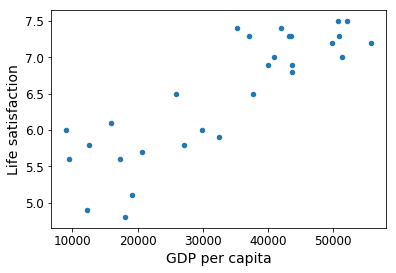

In [20]:
#可视化数据
country_status.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [21]:
#选择一个线性模型
model = sklearn.linear_model.LinearRegression()

In [22]:
#训练模型
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
#为塞浦路斯做预测
X_new = [[22587]]
print(model.predict(X_new))

[[5.96242338]]
